In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="color:white;background-color:Olive;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center"> <font color="White" size=+5 face="Lucida Calligraphy"><div style="align:center: justify">Heart Disease prediction </font></div>

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Introduction  </h1>

<center>
    <img src="https://bestanimations.com/media/organs/1320327612heart-organ-animated-gif-1.gif" alt="Outliers Removal" width="50%">
</center

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Library Importing  </h1>

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import plot_roc_curve

# from sklearn.metrics import plot_precision_recall_curve
# from sklearn.metrics import plot_confusion_matrix


from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve
from sklearn.metrics import recall_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font='Lucida Calligraphy',
              font_scale=1.5,
              color_codes=True,
              rc=None)

import matplotlib

plt.rcParams['figure.figsize'] = (14,8) 
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.edgecolor'] = 'green'
plt.rcParams['figure.frameon'] = True

plt.rcParams["figure.autolayout"] = True

plt.rcParams['axes.facecolor'] = '#F5F5DC'
plt.rcParams['axes.titlesize'] = 25   
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center' 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Olive'
plt.rcParams["axes.axisbelow"] = False 
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2


plt.rcParams["xtick.bottom"] = True 
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True  
plt.rcParams['ytick.color'] = '#A52A2A'

plt.rcParams['axes.grid'] = True 
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--' 
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3       

plt.rcParams['legend.loc'] = 'best' 
plt.rcParams['legend.facecolor'] =  'NavajoWhite'  
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20


plt.rcParams['font.family'] = 'Lucida Calligraphy'
plt.rcParams['font.size'] = 14

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.edgecolor'] = 'Blue'

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 2)

In [8]:
heart1 = pd.read_csv('heart.csv')
heart1.head().style.set_properties(**{'background-color': 'Olive',
                           'color': 'white',
                           'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


<font color="DarkGreen" size=+2 face="Lucida Calligraphy"><div style="text-align: justify">💘 Attributes:</font>
    
- **Age:** Age of the patient [years]
    
- **Sex:** Sex of the patient [M: Male, F: Female]
    
- **ChestPainType:** Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- **RestingBP:** Resting blood pressure [mm Hg]

- **Cholesterol:** Serum cholesterol [mm/dl]
    
- **FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    
- **MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]
    
- **ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]
    
- **Oldpeak:** Oldpeak = ST [Numeric value measured in depression]
    
- **ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    
- **HeartDisease:** Output class [1: heart disease, 0: Normal]

In [9]:
display(heart1.shape)
display(heart1.size)

(918, 12)

11016

In [10]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
heart1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [12]:
heart1.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

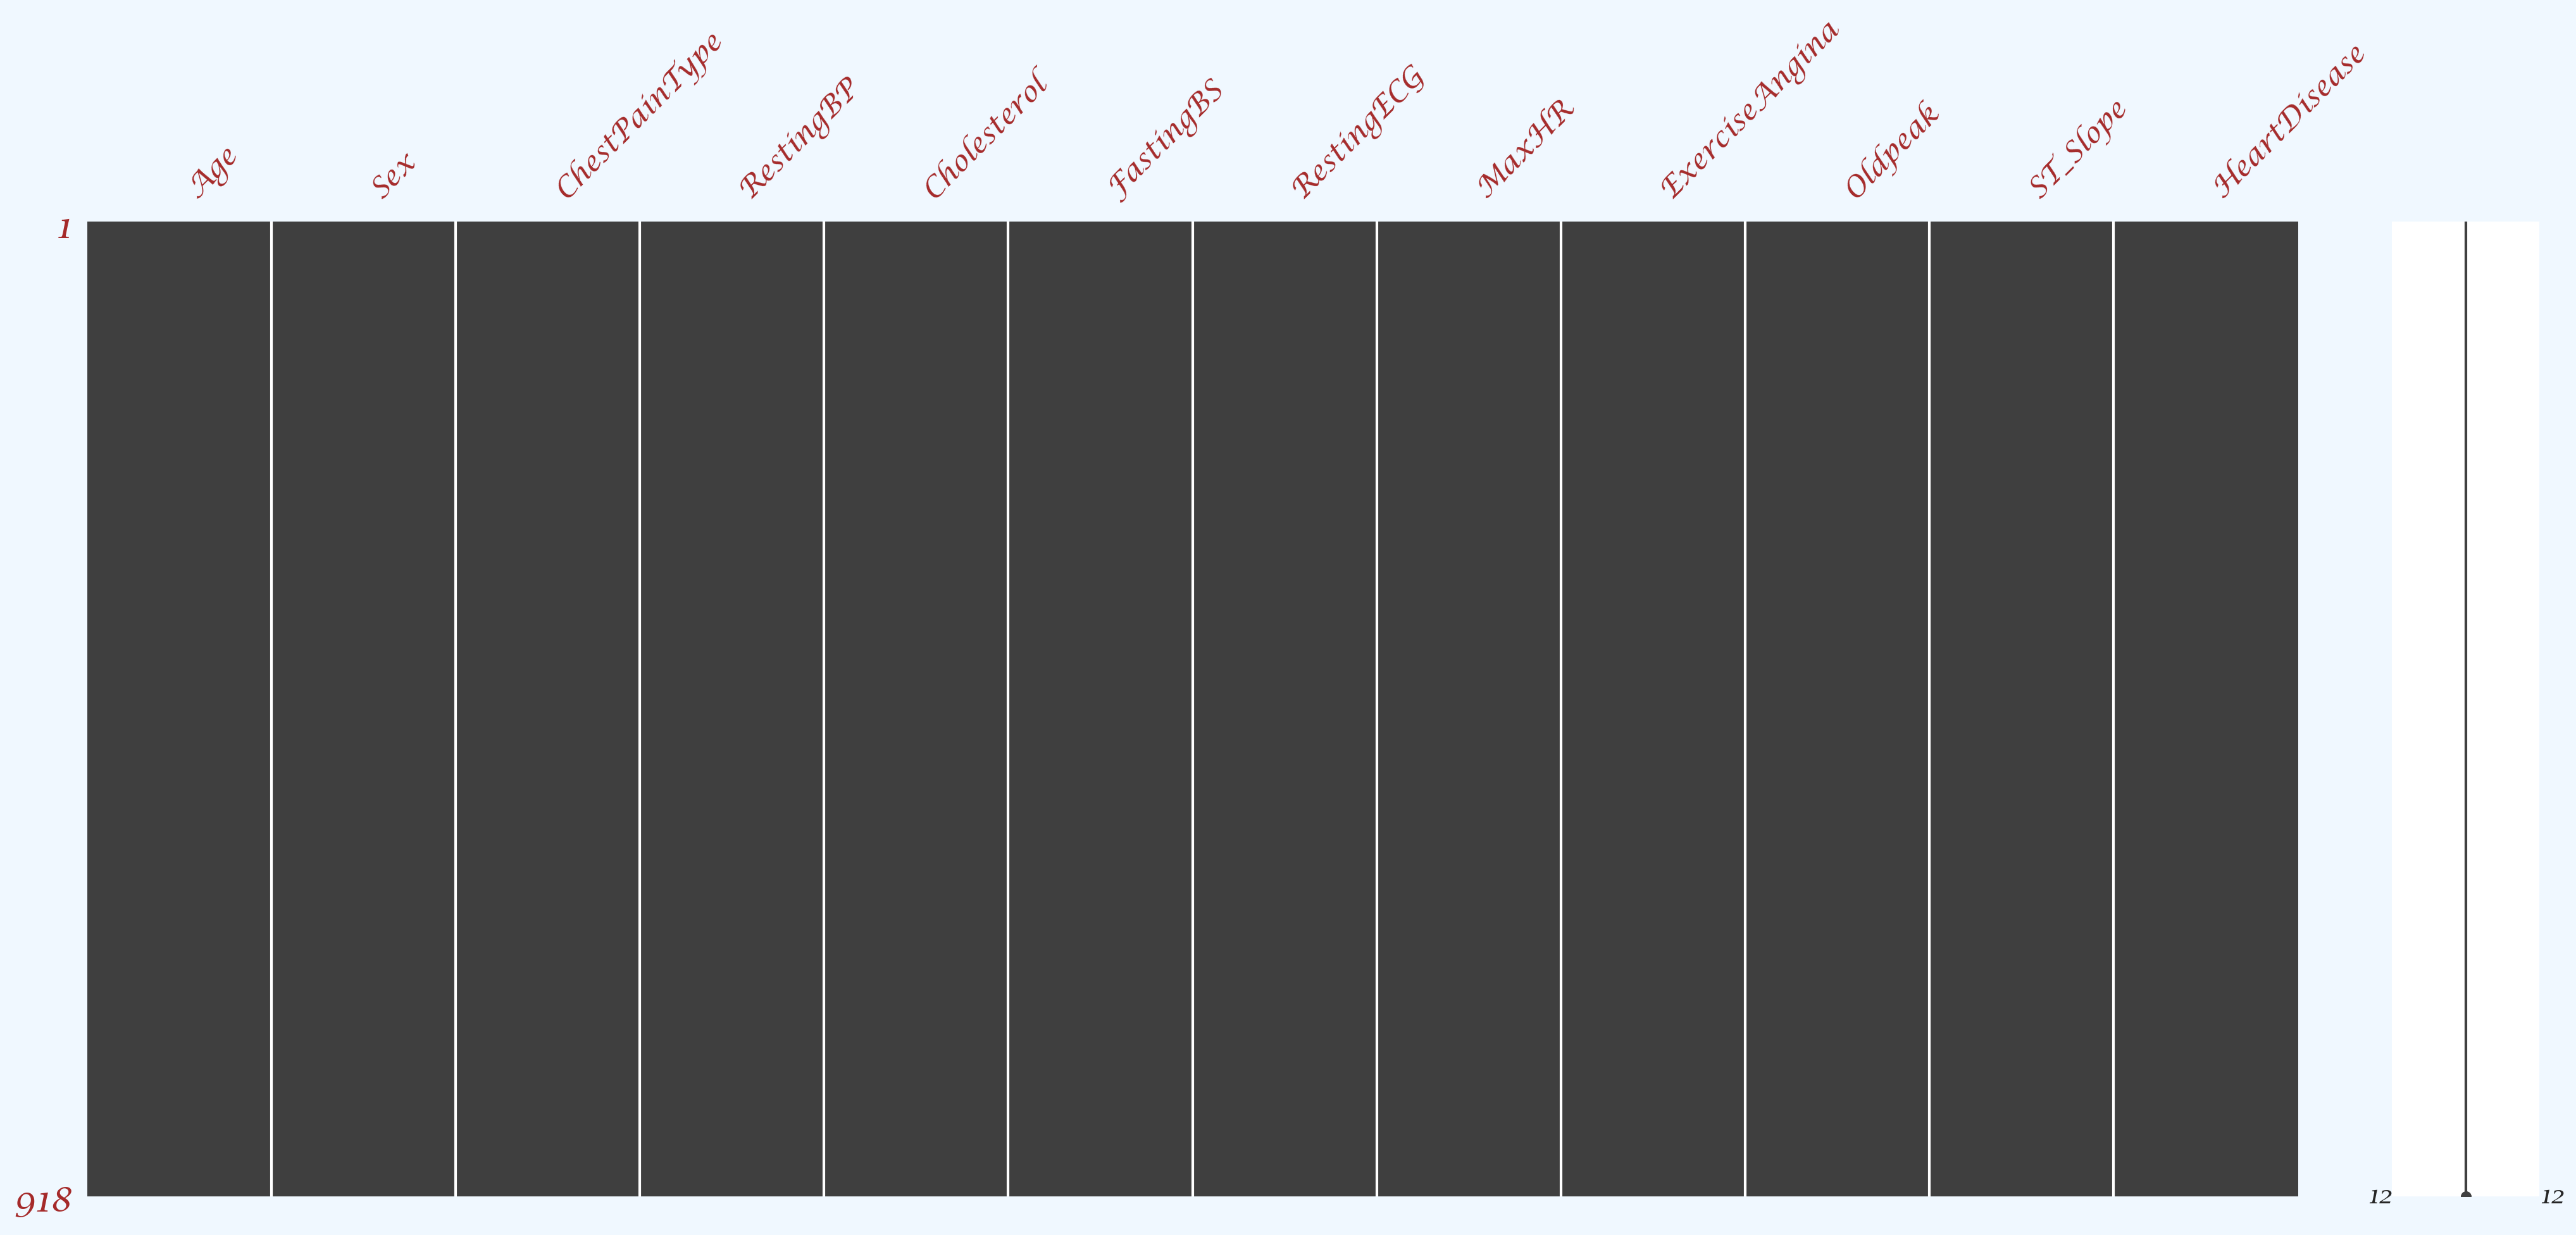

In [13]:
import missingno as msno
msno.matrix(heart1)
plt.show()

In [14]:
Women = heart1.loc[heart1['Sex'] == 'F']["HeartDisease"]
rate_women = (Women.sum()/len(Women)).round(2)*100
print("Percentage of Women with probability of HeartDisease:", rate_women,"%")

Men = heart1.loc[heart1['Sex'] == 'M']["HeartDisease"]
rate_men = (Men.sum()/len(Men)).round(2)*100
print("Percentage of Men with probability of HeartDisease  :", rate_men,"%")

Percentage of Women with probability of HeartDisease: 26.0 %
Percentage of Men with probability of HeartDisease  : 63.0 %


In [15]:
print(f'We have {heart1.shape[0]} instances with the {heart1.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


In [16]:
pd.DataFrame(abs(heart1.corr()['HeartDisease']))

ValueError: could not convert string to float: 'M'

In [ ]:
## Combining Data
heart1.agg(
    {
       "Age": ["min", "max", "median","mean", "skew", 'std'],
        "RestingBP": ["min", "max", "median", "mean","skew",'std'],
        "Cholesterol": ["min", "max", "median", "mean","skew",'std'],
        "Oldpeak": ["min", "max", "median", "mean","skew",'std'],
        "MaxHR": ["min", "max", "median", "mean","skew",'std']
    }
)

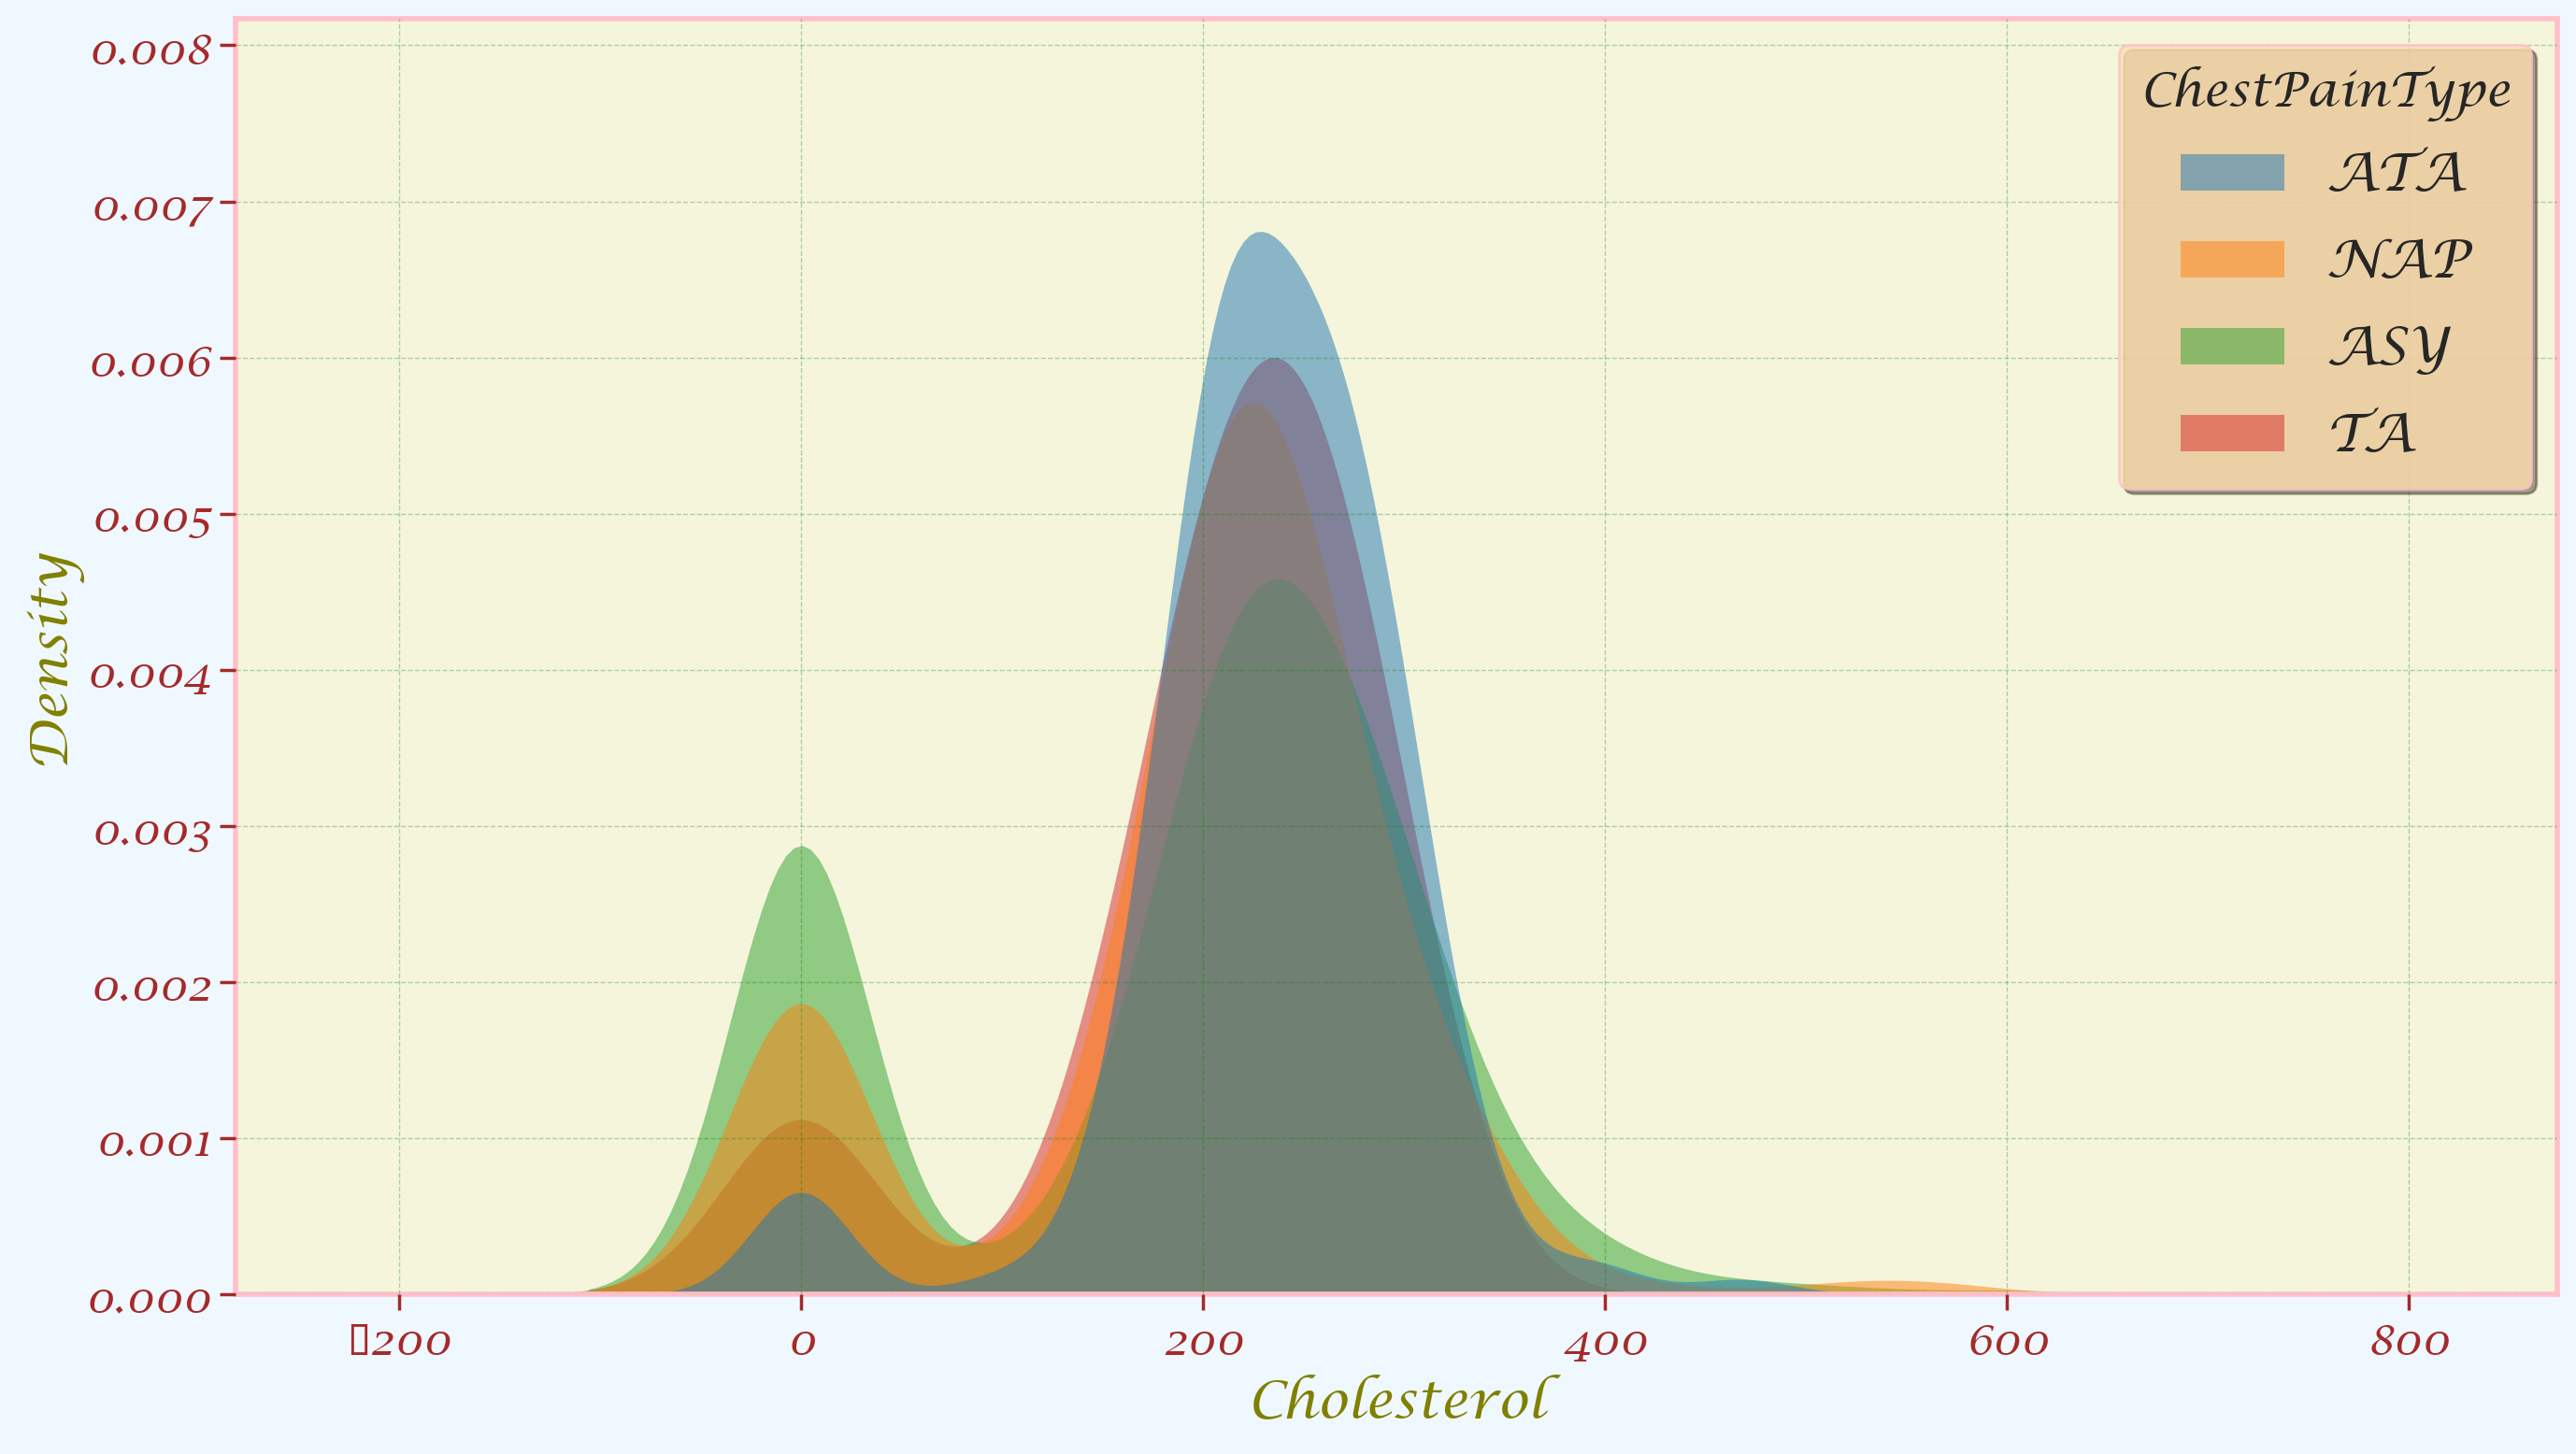

In [22]:
sns.kdeplot( data=heart1, x="Cholesterol", hue="ChestPainType", fill=True, common_norm=False, palette="tab10", alpha=.5, linewidth=0);

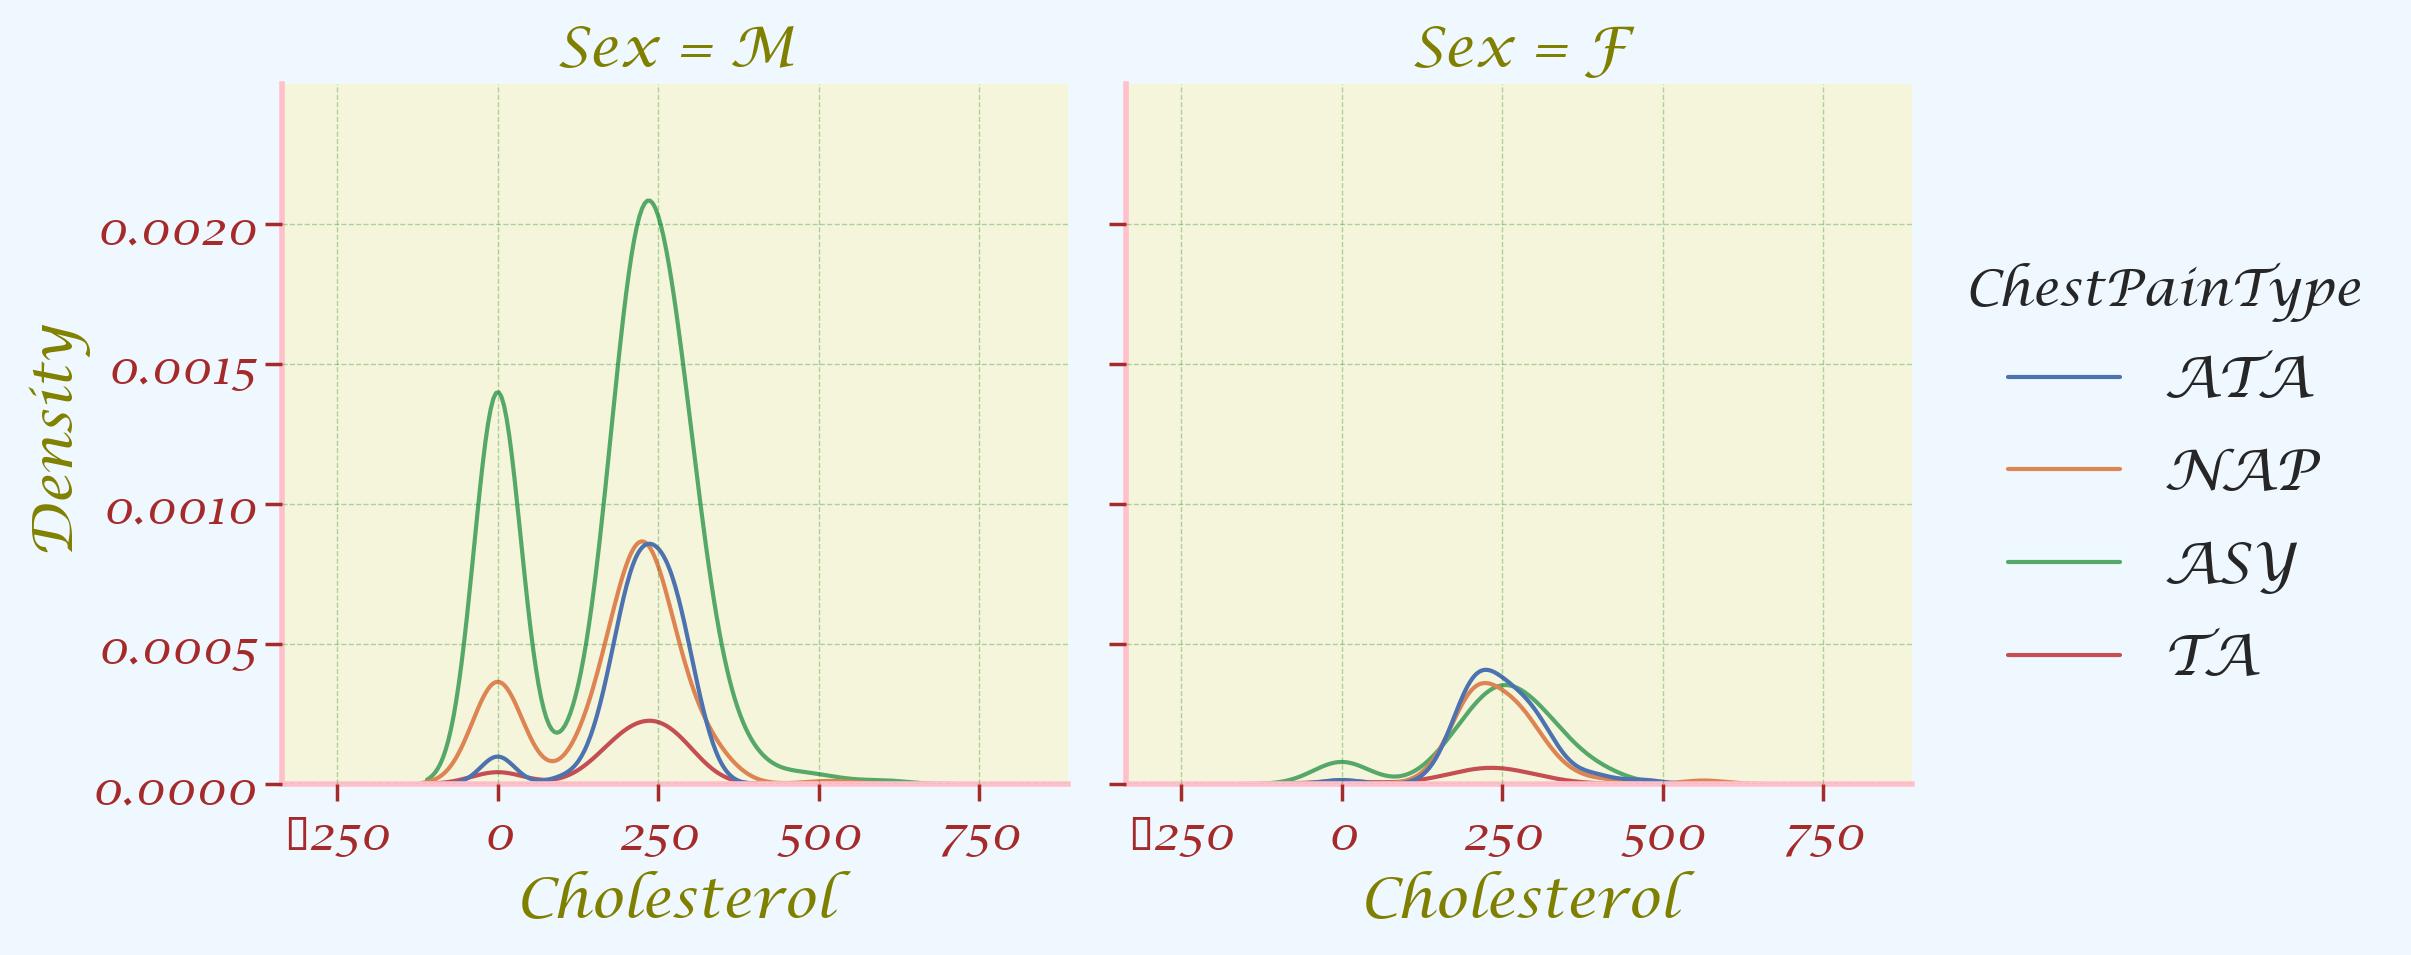

In [21]:
sns.displot(data=heart1, x="Cholesterol", hue="ChestPainType", col="Sex", kind="kde");

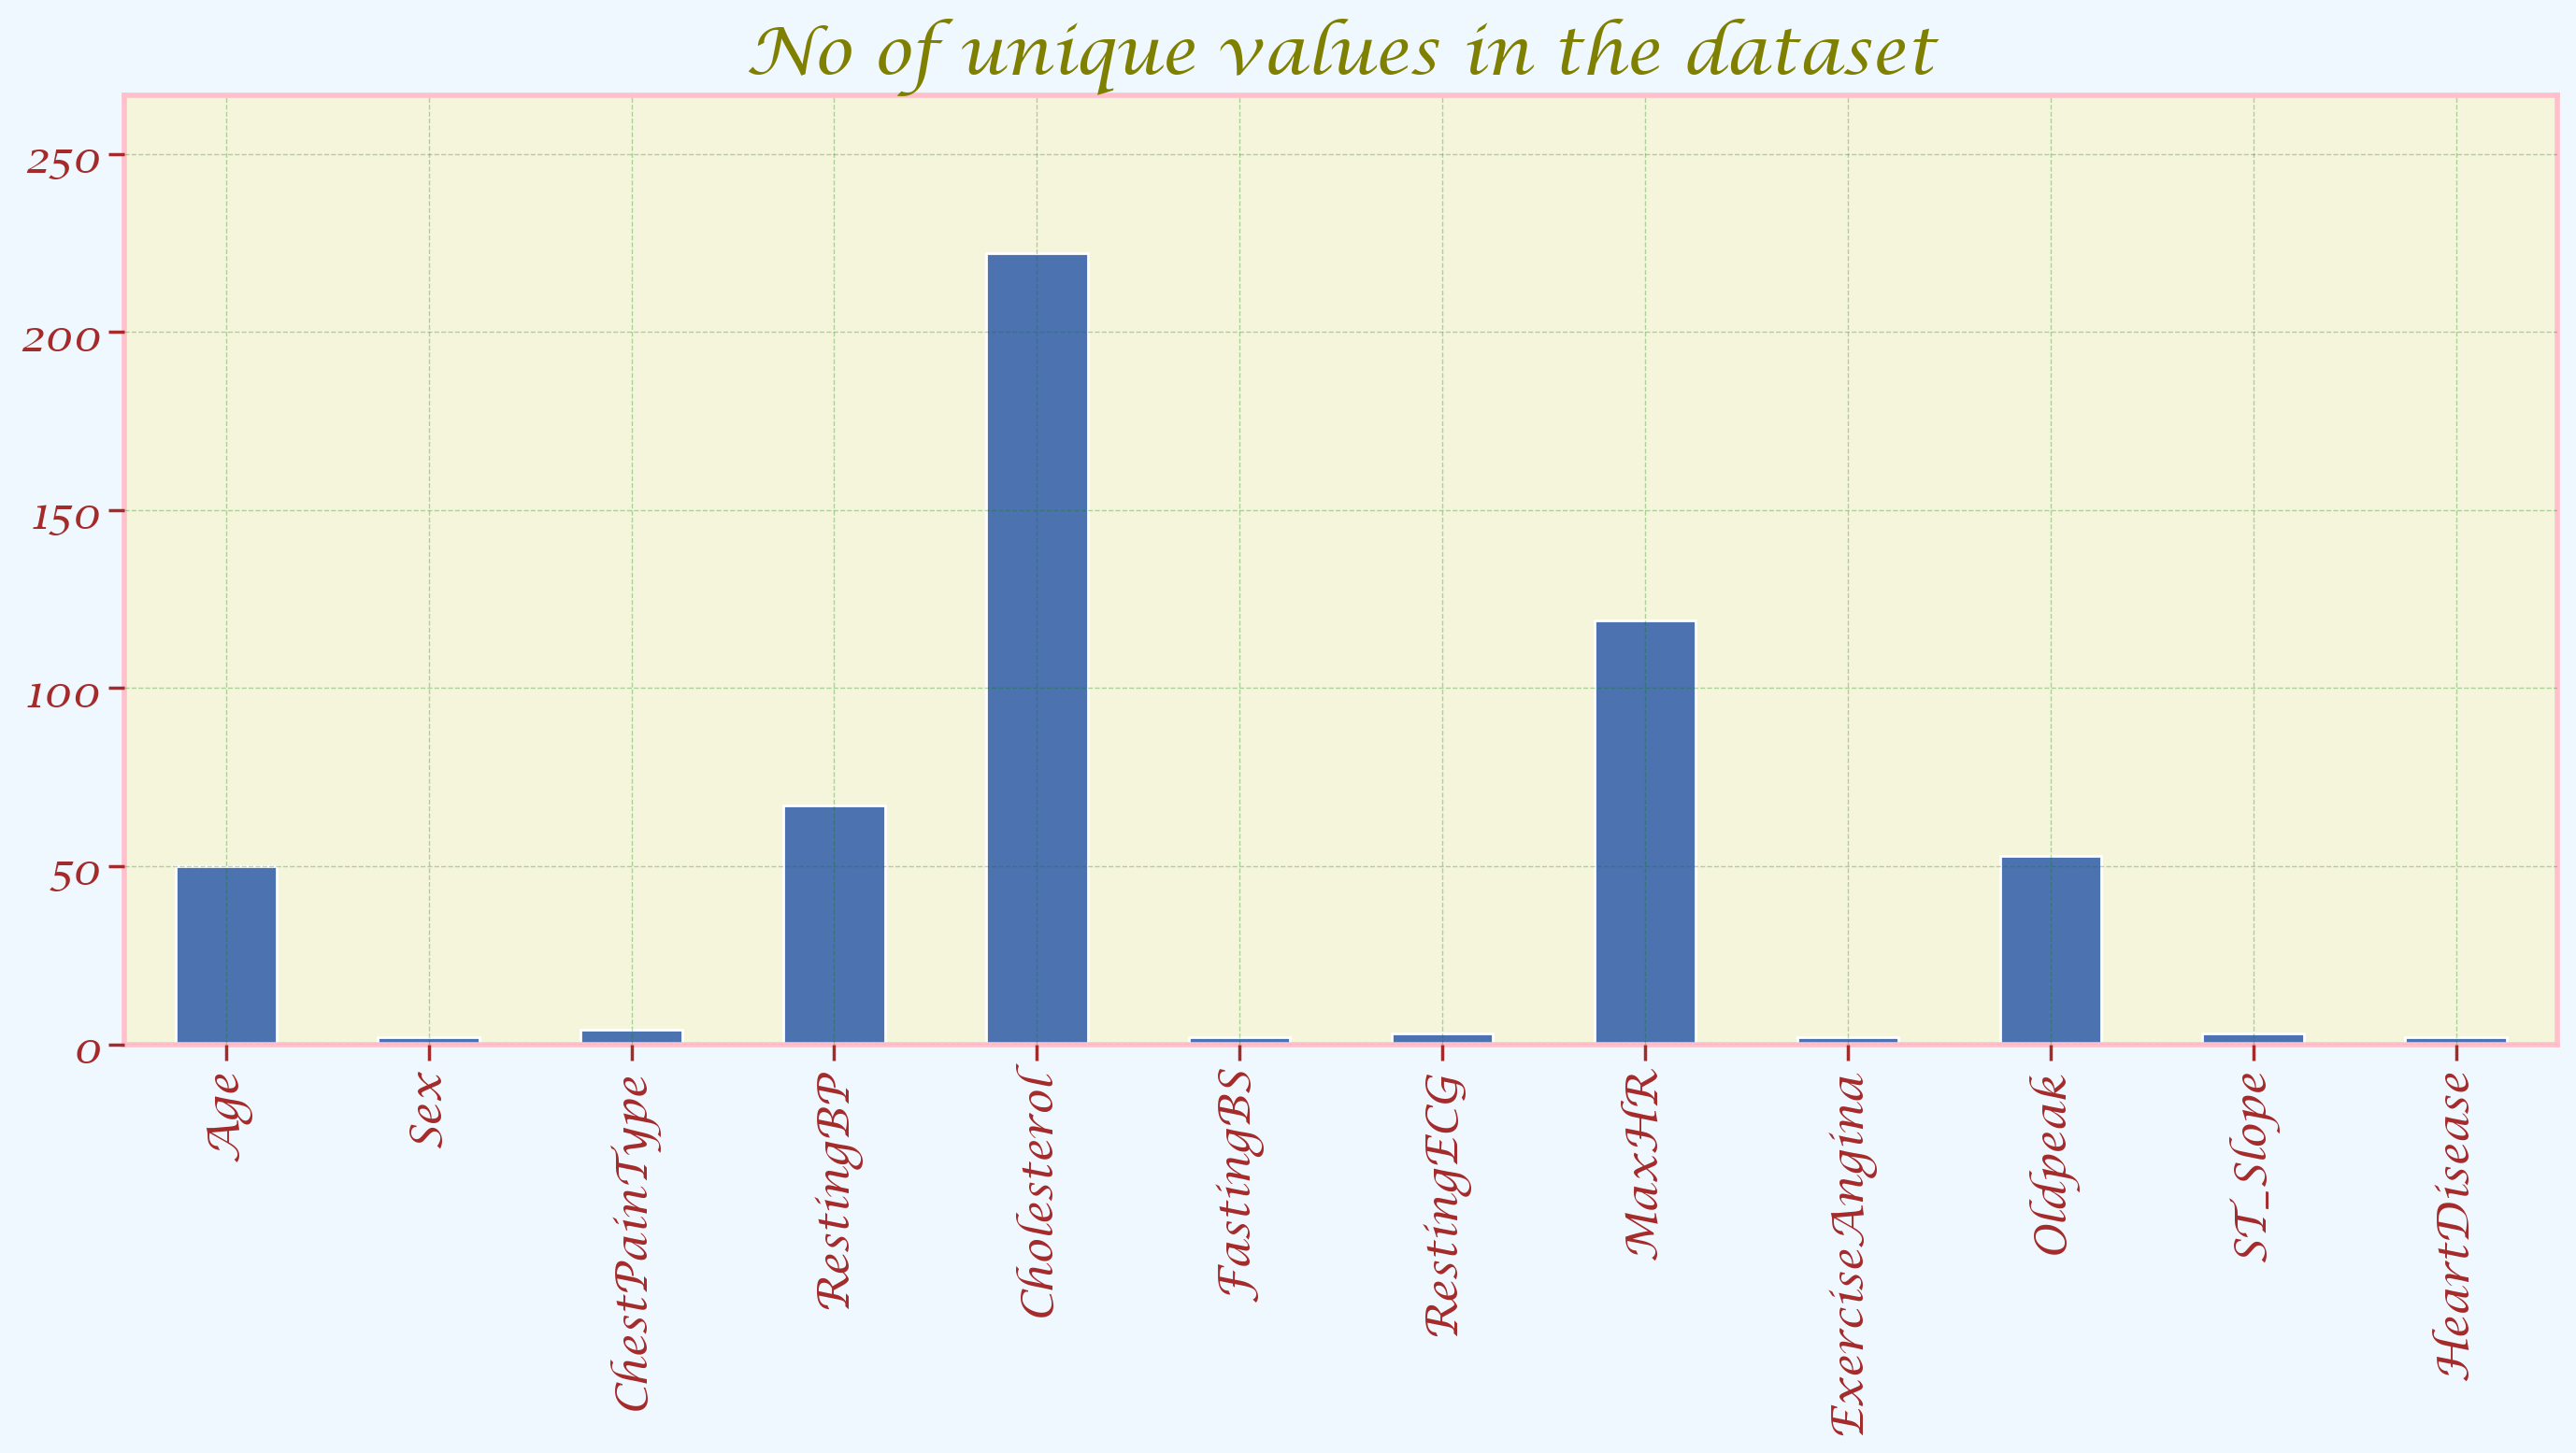

In [20]:
heart1.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.show()

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Outliers in Data  </h1>

**Outliers in Data**
    
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.

<center>
    <img src="https://i0.wp.com/consultglp.com/wp-content/uploads/2019/07/Outlier3.png?w=420&ssl=1" alt="Outliers Removal" width="50%">
</center

**When to Remove Outliers in Data**
    
- An outlier is an observation that lies abnormally far away from other values in a dataset.
- Outliers can be problematic because they can affect the results of an analysis.
- However, they can also be informative about the data you’re studying because they can reveal abnormal cases or individuals that have rare traits.
- In any analysis, you must decide to remove or keep outliers.
    
Fortunately, you can use the following flow chart to help you decide:

<center>
    <img src="https://www.statology.org/wp-content/uploads/2021/11/removeOutlier1-768x654.png" alt="Outliers Removal" width="50%">
</center    

**Different outlier detection technique.**    


- 1. Hypothesis Testing 
- 2. Z-score method  
- 3. Robust Z-score
- 4. I.Q.R method 
- 5. Winsorization method(Percentile Capping) 
- 6. DBSCAN Clustering
- 7. Isolation Forest 
- 8. Visualizing the data


*IQR method is used in this project*   
    

- In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers 


Q1 represents the 1st quartile/25th percentile of the data.
Q2 represents the 2nd quartile/median/50th percentile of the data.
Q3 represents the 3rd quartile/75th percentile of the data. 

- (Q1–1.5*IQR) represent the smallest value in the data set and 
- (Q3+1.5*IQR) represnt the largest value in the data set.


<center><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" alt="Heart Disease" width="50%"></center>

<center><img src="https://www.researchgate.net/publication/353410712/figure/fig1/AS:1048732418203648@1627048701501/Removal-of-outliers-using-IQR-method.png" alt="Heart Disease" width="50%"></center>

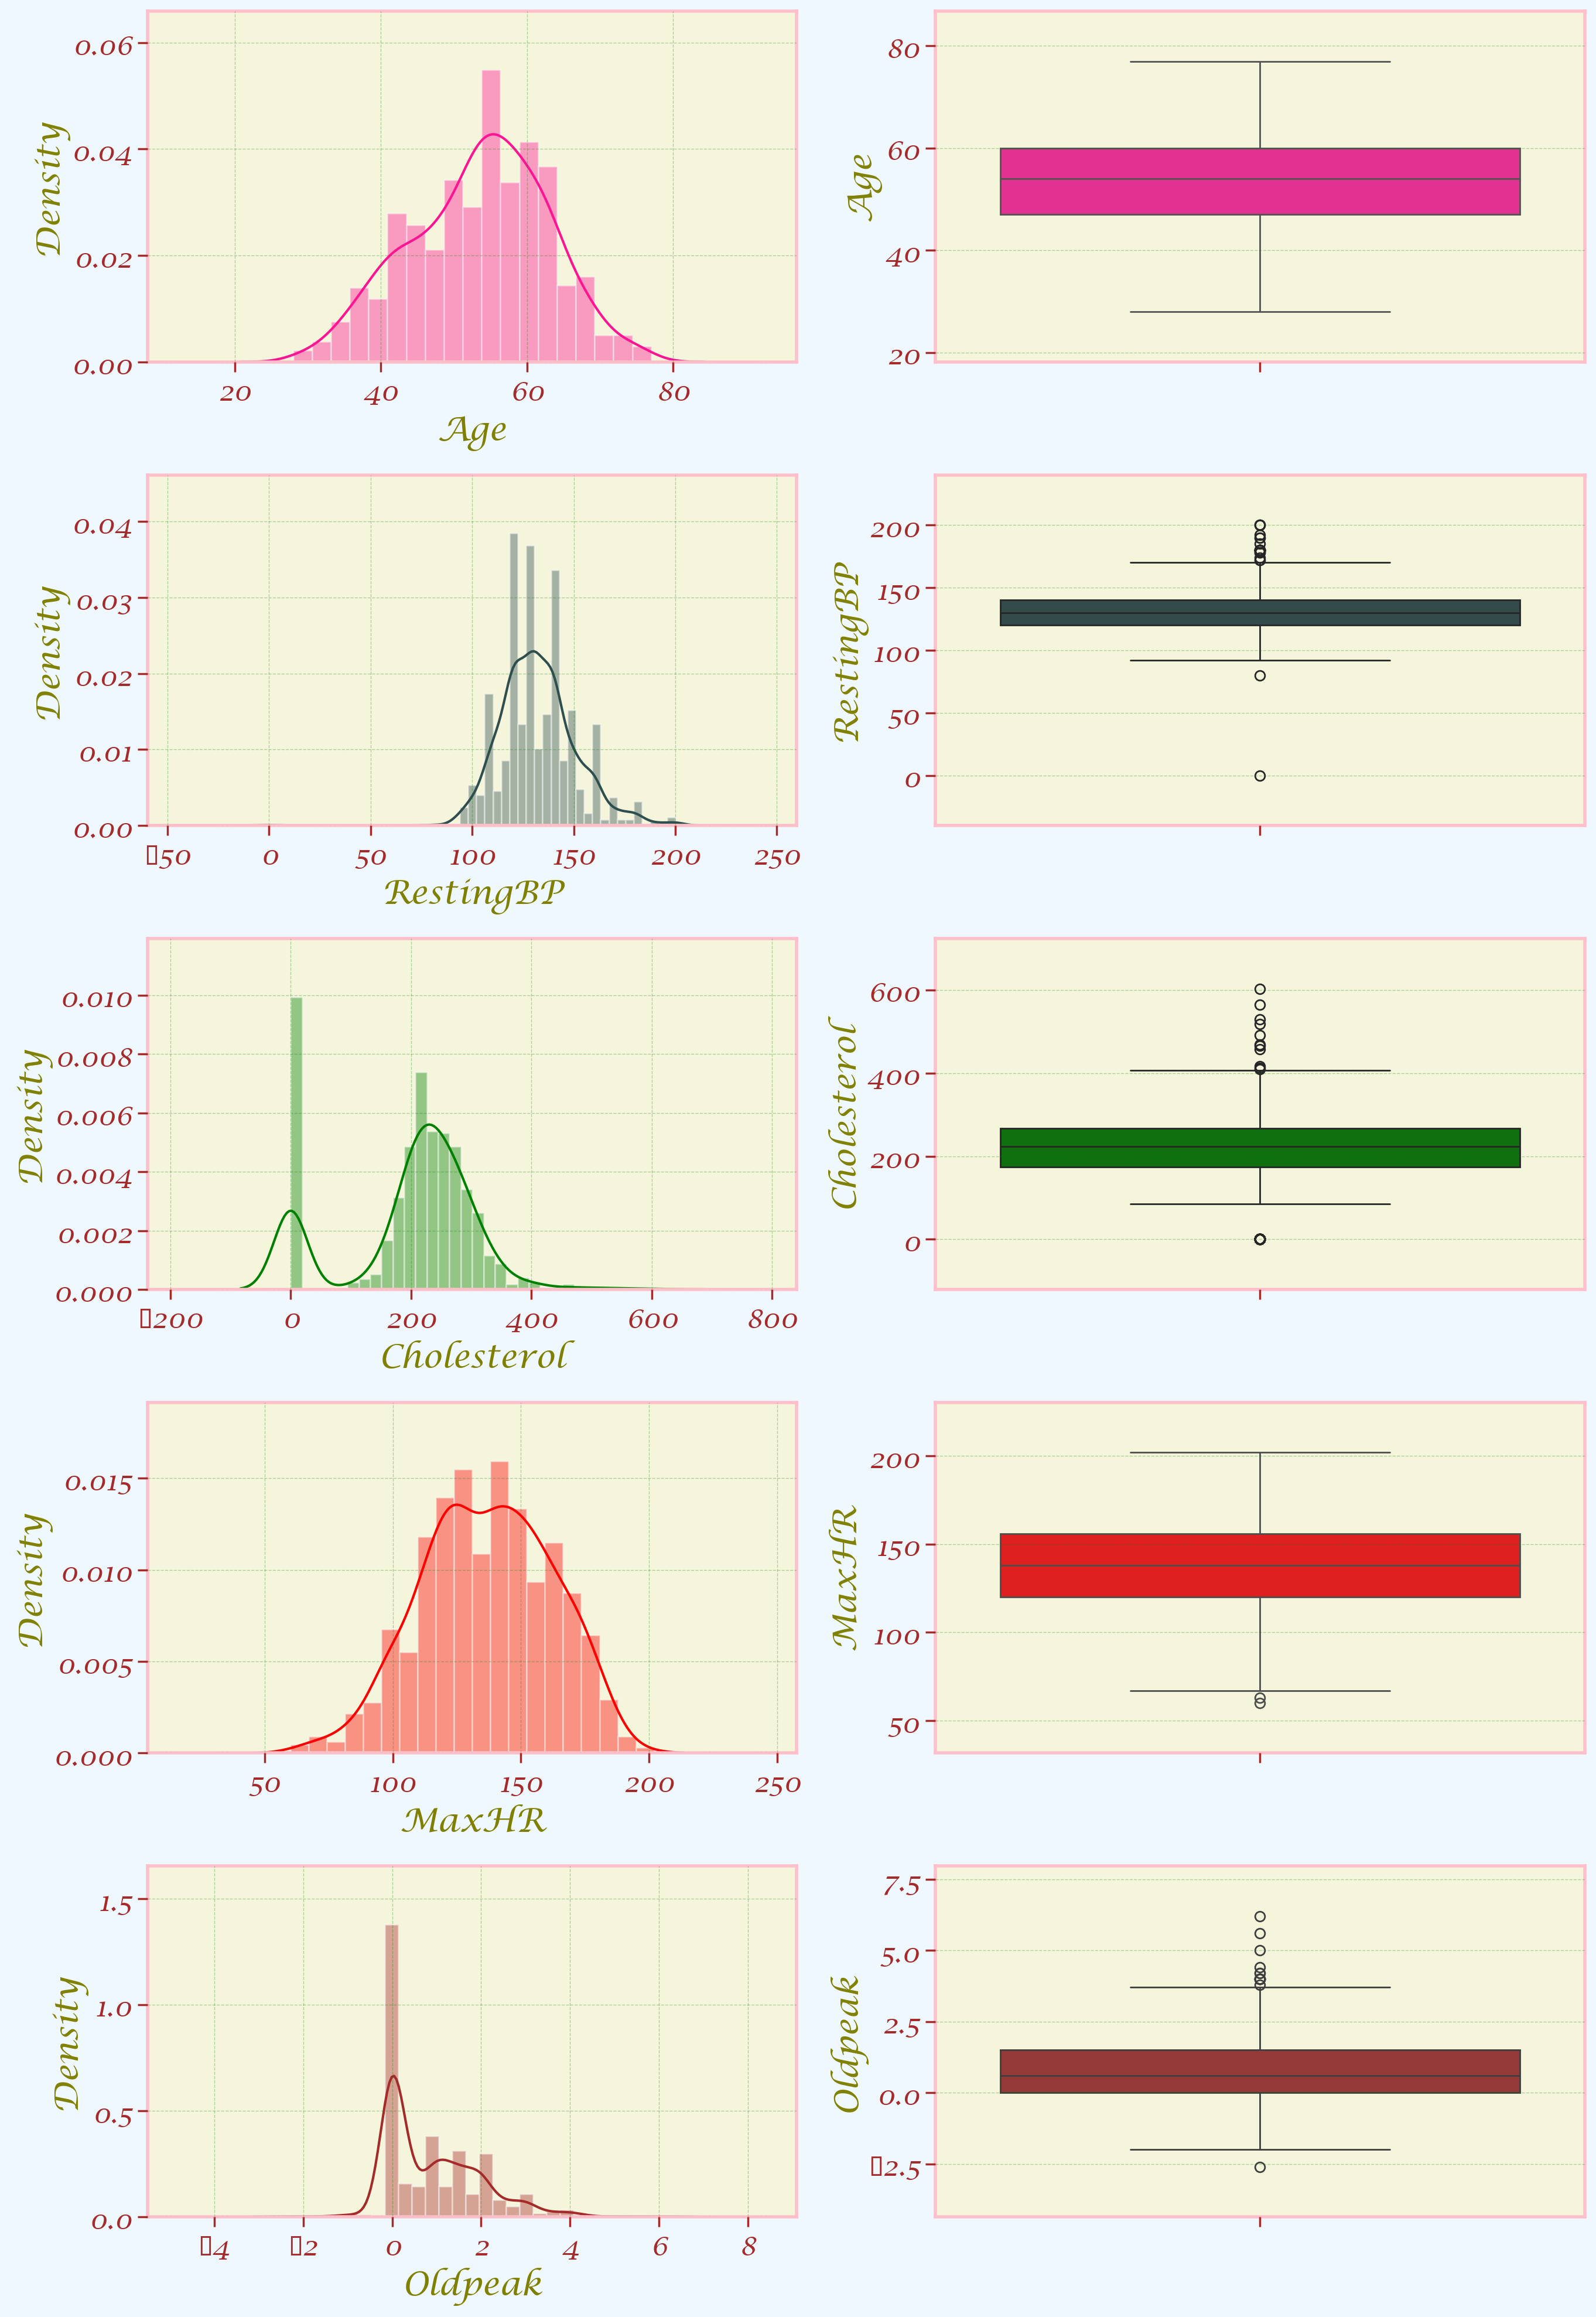

In [17]:
plt.figure(figsize=(14,20))

plt.subplot(5,2,1)
sns.distplot(heart1['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(heart1['Age'],color='DeepPink')

plt.subplot(5,2,3)
sns.distplot(heart1['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(heart1['RestingBP'],color='DarkSlateGray')

plt.subplot(5,2,5)
sns.distplot(heart1['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(heart1['Cholesterol'],color='Green')

plt.subplot(5,2,7)
sns.distplot(heart1['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(heart1['MaxHR'],color='Red')

plt.subplot(5,2,9)
sns.distplot(heart1['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(heart1['Oldpeak'],color='Brown')

plt.tight_layout()
plt.show()

In [18]:
Q1 = heart1.quantile(0.05)
Q3 = heart1.quantile(0.95)
IQR = Q3 - Q1
IQR.sort_values(ascending=False)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [19]:
heart = heart1 [~((heart1 < (Q1 - 1.5 * IQR)) |(heart1 > (Q3 + 1.5 * IQR))).any(axis=1)]

NameError: name 'Q1' is not defined

In [ ]:
plt.figure(figsize=(14,20))

plt.subplot(5,2,1)
sns.distplot(heart['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(heart['Age'],color='DeepPink')

plt.subplot(5,2,3)
sns.distplot(heart['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(heart['RestingBP'],color='DarkSlateGray')

plt.subplot(5,2,5)
sns.distplot(heart['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(heart['Cholesterol'],color='Green')

plt.subplot(5,2,7)
sns.distplot(heart['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(heart['MaxHR'],color='Red')

plt.subplot(5,2,9)
sns.distplot(heart['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(heart['Oldpeak'],color='Brown')

plt.tight_layout()
plt.show()

In [ ]:
# Checking the number of Zeros(0) present in the Cholesterol
Cholesterol = heart[heart['Cholesterol'] == 0]
Cholesterol.shape

**Cholesterol value cannat be zero , So zeros must be filled with median value **

In [ ]:
## Converting Zero Value of Cholesterol to NaN Value
heart.loc[heart['Cholesterol'] == 0,'Cholesterol'] = np.nan
heart.head(1)

In [ ]:
## NaN value of Cholesterol is filled with median value
heart["Cholesterol"] = heart["Cholesterol"].fillna(heart["Cholesterol"].median())

**RestingBP:** 

A total blood pressure reading is determined by measuring the systolic and diastolic blood pressures.</font>
    
- Systolic blood pressure, the top number, measures the force the heart exerts on the walls of the arteries each time it beats.
    
- CrossDiastolic blood pressure, the bottom number, measures the force the heart exerts on the walls of the arteries in between beats.

<center><img src="https://usercontent2.hubstatic.com/7649809_f520.jpg" alt="Heart Disease" width="50%"></center>
    

- In this dataset there is no seprate columns are provided for Systolic and Diastolic Blood Pressure 

In [ ]:
## Checking the presence of Zeros in the RestingBP
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:110%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: red;
            text-align:center;">
 <font color="MediumBlue" size=+1 face="Lucida Calligraphy"><div style="text-align: justify">RestingBP represents the blood pressure of the patient. It is not possible to have values equal to Zero(0).There is only one Zero in RestingBP  <font color="Red">So I'll remove the value Zero(0)</font></font> 
</div>

In [ ]:
heart = heart.drop(heart[(heart['RestingBP'] == 0)].index)    

In [ ]:
Systolic_RestingBP = heart[heart['RestingBP'] >= 100]
display(Systolic_RestingBP.value_counts().sum())

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:110%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: red;
            text-align:center;">
 <font color="MediumBlue" size=+1 face="Lucida Calligraphy"><div style="text-align: justify">In RestingBP, number Systolic blood pressure of the patient is 905,  <font color="Red">this is calculated from the range of Systolic which is from 70 to 190 and above </font></font> 
</div>

In [ ]:
Diastolic_RestingBP = heart[heart['RestingBP'] <= 100]
display(Diastolic_RestingBP.value_counts().sum())

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:110%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: red;
            text-align:center;">
 <font color="MediumBlue" size=+1 face="Lucida Calligraphy"><div style="text-align: justify">In RestingBP, number Diastolic blood pressure of the patient is only 27,  <font color="Red">this is calculated from the range of Diastolic which is from 40 to 100 </font></font> 
</div>

In [ ]:
print(Systolic_RestingBP.shape)
print(Diastolic_RestingBP.shape)

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:110%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: red;
            text-align:center;">
 <font color="MediumBlue" size=+1 face="Lucida Calligraphy"><div style="text-align: justify">In RestingBP, data is totally unbalanced because for a person both Systolic & Diastolic Blood Pressure is measured at a same time. So it is concluded that RestingBP data set is only of Systolic Blood Pressure  </font></font> 
</div>

In [ ]:
heart['Diastolic_RestingBP'] = np.where( heart['RestingBP'] <=100, 1,0)
heart.sample(5)

In [ ]:
heart['RestingBP'].min()

In [ ]:
heart["RestingBP"].max()

In [ ]:
heart["RestingBP_Category"]= pd.cut(heart["RestingBP"] ,bins=[0,120, 129 , 139,200] ,labels=["Normal_BP","Elevated_BP","Hypertension_Stage_1", "Hypertension_Stage_2"] )
print("Value Counts :\n\n",heart['RestingBP_Category'].value_counts())

heart.sample(5)

In [ ]:
# converting from categorical variable to object type
heart['RestingBP_Category'] = heart['RestingBP_Category'].astype(object)

<center><img src="https://www.businessinsider.in/photo/77160646/Master.jpg" alt="Heart Disease" width="80%"></center>

In [ ]:
heart['Age'].min()

In [ ]:
heart["Cholesterol_Category"]= pd.cut(heart["Cholesterol"] ,bins=[0, 200, 230 , 500] ,labels=["Normal","Borderline","High" ] )
print("Value Counts :\n\n",heart['Cholesterol_Category'].value_counts())

heart.head()

In [ ]:
heart.dtypes

In [ ]:
# converting from categorical variable to object type
heart['Cholesterol_Category'] = heart['Cholesterol_Category'].astype(object)

In [ ]:
heart.dtypes

In [ ]:
heart['Cholesterol_Category'].value_counts()

In [ ]:
numerical = heart.select_dtypes(include=['number']).columns
categorical = heart.select_dtypes(include=['object']).columns

print('Numerical  :',numerical)
print("**********"*10)
print("Categorical:",categorical)

In [ ]:
for col in heart[categorical]:
    print(heart[col].value_counts()) 
    print("****"*7)

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=heart)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=heart['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='ChestPainType', data=heart)
ax.bar_label(ax.containers[0])
plt.title("ChestPainType", fontsize=20)
ax =plt.subplot(1,2,2)
ax=heart['ChestPainType'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ChestPainType", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='RestingECG', data=heart)
ax.bar_label(ax.containers[0])
plt.title("RestingECG", fontsize=20)

ax =plt.subplot(1,2,2)
ax=heart['RestingECG'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "RestingECG", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='ExerciseAngina', data=heart)
ax.bar_label(ax.containers[0])
plt.title("ExerciseAngina", fontsize=20)

ax =plt.subplot(1,2,2)
ax=heart['ExerciseAngina'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ExerciseAngina", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='ST_Slope', data=heart)
ax.bar_label(ax.containers[0])
plt.title("ST_Slope", fontsize=20)


ax =plt.subplot(1,2,2)
ax=heart['ST_Slope'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ST_Slope", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Cholesterol_Category', data=heart)
ax.bar_label(ax.containers[0])
plt.title("Cholesterol_Categoryy", fontsize=20)

ax =plt.subplot(1,2,2)
ax=heart['Cholesterol_Category'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Cholesterol_Category", fontsize = 20,color='Red',font='Lucida Calligraphy');

In [ ]:
plt.rcParams['legend.fontsize'] = 10

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='RestingBP_Category', data=heart)
ax.bar_label(ax.containers[0])
plt.title("RestingBP_Category", fontsize=20)
plt.legend(labels=['M','F'])
plt.legend(labels=['Hypertension_Stage_2','Normal_BP','Hypertension_Stage_1','Elevated_BP '])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=heart['RestingBP_Category'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "RestingBP_Category", fontsize = 20,color='Red',font='Lucida Calligraphy');
plt.legend(labels=['Hypertension_Stage_2','Normal_BP','Hypertension_Stage_1','Elevated_BP '])
plt.axis('off');

In [ ]:
corr = heart.groupby(["ChestPainType"])[["Age","RestingBP"]].corr()
corr.head()

In [ ]:
sns.heatmap(corr , annot=True , fmt =".2f")
plt.xlabel("Vars")
plt.ylabel("Age category")
plt.title("Corr between Age and RestingBP")
plt.show()

In [ ]:
# Displaying all correlations with ascending sort.
heart.corr().unstack().sort_values(ascending=False).drop_duplicates()

In [ ]:
print(heart['ChestPainType'][heart['Sex']=='F'].value_counts(normalize=True)*100)

In [ ]:
print('ChestPainType in Females:\n')
print(heart['ChestPainType'][heart['Sex']=='F'].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('ChestPainType in Males:\n')
print(heart['ChestPainType'][heart['Sex']=='M'].value_counts(normalize=True)*100)

In [ ]:
print('ST_Slope in Females:\n')
print(heart['ST_Slope'][heart['Sex']=='F'].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('ST_Slope in Males:\n')
print(heart['ST_Slope'][heart['Sex']=='M'].value_counts(normalize=True)*100)

In [ ]:
print('Heart Disease in Females:\n')
print(heart['HeartDisease'][heart['Sex']=='F'].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('Heart Disease in Males:\n')
print(heart['HeartDisease'][heart['Sex']=='M'].value_counts(normalize=True)*100)

In [ ]:
print('Heart Disease in RestingECG:\n')
print(heart['RestingECG'][heart['HeartDisease']== 1 ].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('Heart Disease in RestingECG:\n')
print(heart['RestingECG'][heart['HeartDisease']== 0 ].value_counts(normalize=True)*100)

In [ ]:
print('Heart Disease in RestingBP_Category:\n')
print(heart['RestingBP_Category'][heart['HeartDisease']== 1 ].value_counts(normalize=True)*100)
print("********"*5,"\n")
print('Heart Disease in RestingBP_Category:\n')
print(heart['RestingBP_Category'][heart['HeartDisease']== 0 ].value_counts(normalize=True)*100)

In [ ]:
heart_final = heart.drop(['RestingBP','Cholesterol',],axis=1)
heart_final.head()

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Converting Categorial Variable into numerical Variable  </h1>

In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['ChestPainType','RestingECG','ST_Slope','Cholesterol_Category','RestingBP_Category'])
heart_final = encoder.fit_transform(heart_final)

heart_final.head()

In [ ]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['Sex','ExerciseAngina'],drop_invariant=True)
heart_final1 = encoder.fit_transform(heart_final)

heart_final1.head()

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Data train test split  </h1>

In [ ]:
X = heart_final1.drop('HeartDisease',axis=1) 
y = heart_final1['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Standardizing the data by using MinMaxScaler  </h1>

In [ ]:
# scaling dataset with robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


display(X_train.head())
display(X_test.head())

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Model Building  </h1>

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> LogisticRegression  </h2>

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_log))

<font color="Red" size=+3 face="Lucida Calligraphy"><div style="text-align: justify">Confusion Matrix</font>

**Confusion Matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


*Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:*

<center>
    <img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Confusion Matrix" width="70%">
</center>

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.** 
    
- These four outcomes are summarized in a confusion matrix given below:

In [ ]:
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

<font color="Red" size=+3 face="Lucida Calligraphy"><div style="text-align: justify">ROC Curve</font>

**ROC Curve**
    
*ROC Curve (Receiver Operating Characteristic)*

- The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.    

*Area under the ROC curve:*

- Area under the ROC (Receiver Operating Characteristic) curve : AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease  


<center>
    <img src="http://web.cs.ucla.edu/~mtgarip/images/ROC_curve.png" alt="ROC Curve" width="80%">
</center

In [ ]:
plot_roc_curve(logreg, X_test, y_test);
plt.title('Roc Curve');

<font color="Red" size=+3 face="Lucida Calligraphy"><div style="text-align: justify">Precision Recall Curve</font>

**Precision Recall Curve**
    
There are numerous ways to evaluate the performance of a classifier. In this article, we introduce the Precision-Recall Curve and further examine the difference between two popular performance reporting methods: Precision-Recall (PR) Curve and Receiver Operating Characteristic (ROC) Curve.

A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains TP/(TP+FN) on the y-axis and TP/(TP+FP) on the x-axis.   
    
- It is important to note that Precision is also called the Positive Predictive Value (PPV)
- Recall is also called Sensitivity, Hit Rate or True Positive Rate (TPR)
    
*Interpreting a PR Curve*


It is desired that the algorithm should have both high precision, and high recall. However, most machine learning algorithms often involve a trade-off between the two. A good PR curve has greater AUC (area under curve). In the figure above, the classifier corresponding to the Orange line has better performance than the classifier corresponding to the Other lines.It is important to note that the classifier that has a higher AUC on the ROC curve will always have a higher AUC on the PR curve as well.   

<center>
    <img src="https://www.researchgate.net/publication/338915798/figure/fig4/AS:853020388622336@1580387317390/Precision-recall-curve-per-model.ppm" alt="Precision Recall Curve" width="80%">
</center

In [ ]:
plot_precision_recall_curve(logreg, X_test, y_test)
plt.title('Precision Recall Curve');

<font color="Red" size=+3 face="Lucida Calligraphy"><div style="text-align: justify">Cross val Score</font>

**Cross val Score**
    
Cross_val_score is a function in the scikit-learn package which trains and tests a model over multiple folds of your dataset. This cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split.

*The process that cross_val_score uses is typical for cross validation and follows these steps:*   
    
    
- The number of folds is defined, by default this is 5
- The dataset is split up according to these folds, where each fold has a unique set of testing data
- A model is trained and tested for each fold
- A model is trained and tested for each fold
- The mean and standard deviation of these metrics can then be calculated to provide a single metric for the process
      
    
*What is cross_val_score used for?*
    
- Cross_val_score is used as a simple cross validation technique to prevent over-fitting and promote model generalisation.   
    
- The typical process of model development is to train a model on one fold of data and then test on another. But how do we know that this single test dataset is representative? This is why we use cross_val_score and cross validation more generally, to train and test our model on multiple folds such that we can be sure out model generalises well across the whole dataset and not just a single portion.

- If we see that the metrics for all folds in cross_val_score are uniform then it can be concluded that the model is able to generalise, however if there are significant differences between them then this may indicate over-fitting to certain folds and would need to be investigated further 

<center>
    <img src="https://stephenallwright.com/content/images/2022/06/cross_val_score-method.png" alt="Cross val Score" width="80%">
    </center> 

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=logreg, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> Support Vector Machines  </h2>

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy     :",svc_train,"%")
print("Model Accuracy Score  :",svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

In [ ]:
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(svc, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(svc, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> KNeighborsClassifier</h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

In [ ]:
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(knn, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(knn, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=knn, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> GaussianNB</h2>

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred_NB, y_test) * 100, 2)
gaussian_f1 = round(f1_score(y_pred_NB, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train,"%")
print("Model Accuracy Score  :",gaussian_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_NB))

In [ ]:
plot_confusion_matrix(gaussian, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(gaussian, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(gaussian, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=gaussian, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> Perceptron</h2>

In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

In [ ]:
plot_confusion_matrix(perceptron, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(perceptron, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(perceptron, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=perceptron, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> LinearSVC</h2>

In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_LinearSVC = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_LinearSVC, y_test) * 100, 2)
linear_svc_f1 = round(f1_score(y_pred_LinearSVC, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train,"%")
print("Model Accuracy Score :",linear_svc_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_LinearSVC))

In [ ]:
plot_confusion_matrix(linear_svc, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(linear_svc, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(linear_svc, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=linear_svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> SGDClassifier</h2>

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_SGD, y_test) * 100, 2)
sgd_f1 = round(f1_score(y_pred_SGD, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train,"%")
print("Model Accuracy Score  :",sgd_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_SGD))

In [ ]:
plot_confusion_matrix(sgd, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(sgd, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(sgd, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=sgd, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue"> SDecisionTreeClassifier</h2>

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

In [ ]:
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(decision, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(decision, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=decision, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue">  RandomForestClassifier </h2>

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train,"%")
print("Model Accuracy Score  :",random_forest_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_random))

In [ ]:
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(random_forest, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(random_forest, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=random_forest, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue">  MLPClassifier </h2>

In [ ]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_MLP = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_MLP, y_test) * 100, 2)
mlp_f1 = round(f1_score(y_pred_MLP, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train,"%")
print("Model Accuracy Score  :",mlp_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_MLP))

In [ ]:
plot_confusion_matrix(mlp, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(mlp, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(mlp, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=mlp, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue">  XGBClassifier </h2>

In [ ]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train,"%")
print("Model Accuracy Score  :",xgb_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(xgb, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(xgb, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=xgb, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="OrangeRed"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Blue">  GaussianProcessClassifier </h2>

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RBF = GaussianProcessClassifier(1.0 * RBF(1.0))
RBF.fit(X_train,y_train)
y_pred_RBF = RBF.predict(X_test)

RBF_train = round(RBF.score(X_train, y_train) * 100, 2)
RBF_accuracy = round(accuracy_score(y_pred_RBF, y_test) * 100, 2)
RBF_f1 = round(f1_score(y_pred_RBF, y_test) * 100, 2)

print("Training Accuracy    :",RBF_train ,"%")
print("Model Accuracy Score :",RBF_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_RBF))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(RBF, X_test, y_test);
plt.title('Confusion Matrix');

In [ ]:
plot_roc_curve(RBF, X_test, y_test);
plt.title('Roc Curve');

In [ ]:
plot_precision_recall_curve(RBF, X_test, y_test)
plt.title('Precision Recall Curve');

In [ ]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=RBF, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Blue"> Comparing Models</h1>

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Support Vector Machines', 'KNeighborsClassifier', 
        'GaussianNB','Perceptron', 'Linear SVC','Stochastic Gradient Decent',
        'Decision Tree','Random Forest', 'MLPClassifier' ,'XGBClassifier', 'GaussianProcessClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train, RBF_train
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1, RBF_f1
    ],
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy, RBF_accuracy
    ]
    
})

In [ ]:
# Accuracy Comparison Table 
models.sort_values(
    by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='cool').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [ ]:
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2


import seaborn as sns

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('LETS COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

In [ ]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(15).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })